In [28]:
def best_pca_component_model(X_train,X_test,y_train,y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score
    from sklearn.naive_bayes import GaussianNB
    
    for v in [1e-9, 1e-5, 1e-1, .2, .5, 1]:
        clf = GaussianNB(var_smoothing=v).fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))
        print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

    m = np.mean(X_train, axis=0)
    X_train = X_train - m
    X_test = X_test -m
    S = np.cov(X_train.T, bias=True)
    La, U = np.linalg.eigh(S)
    i = La.argsort()[::-1]; La = La[i]; U = U[:,i]


    v=0.1
    K=50
    acc= np.empty(K)
    acc[0]=0.0
    for k in np.arange(1, K):
        Xr_train = X_train @ U[:,0:k]
        Xr_test = X_test @ U[:,0:k]
        clf = GaussianNB(var_smoothing=v).fit(Xr_train, y_train)
        acc[k] = accuracy_score(y_test, clf.predict(Xr_test)) * 100
    plt.figure(1, figsize=(8,8))
    plt.axis([0, K, 0, 100])
    plt.plot(acc, '-bo', linewidth=2)
    plt.xlabel('# Components')
    plt.ylabel('Accuracy (%)')
    plt.xticks(np.arange(0,K+1,2))
    plt.yticks(np.arange(0,101,5))
    plt.show()


## MNIST

In [25]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [26]:
X_train[0].shape

(784,)

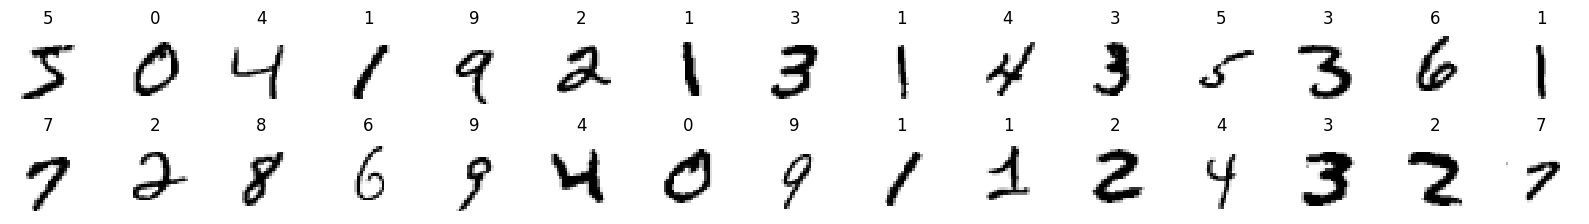

In [2]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(y)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

La precisión de GaussianNB() es 55.6%
La precisión de GaussianNB(var_smoothing=1e-05) es 64.1%
La precisión de GaussianNB(var_smoothing=0.1) es 81.4%
La precisión de GaussianNB(var_smoothing=0.2) es 80.8%
La precisión de GaussianNB(var_smoothing=0.5) es 77.9%
La precisión de GaussianNB(var_smoothing=1) es 74.7%


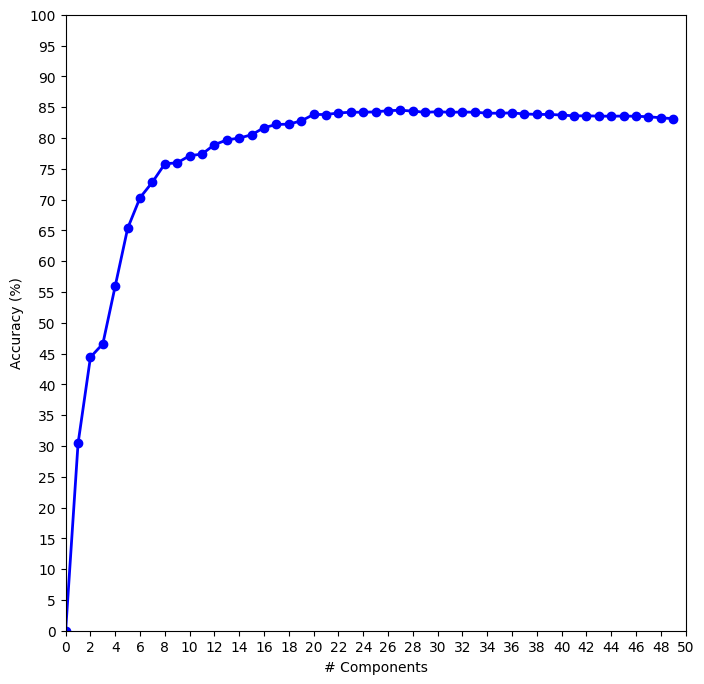

In [29]:
best_pca_component_model(X_train,X_test, y_train, y_test)

## EMNIST 

## olivetti

In [14]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
orl = fetch_olivetti_faces()
X = orl.data
y = orl.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=23)

In [24]:
X_train[0].shape

(4096,)

La precisión de GaussianNB() es 80.0%
La precisión de GaussianNB(var_smoothing=1e-05) es 80.0%
La precisión de GaussianNB(var_smoothing=0.1) es 86.7%
La precisión de GaussianNB(var_smoothing=0.2) es 85.8%
La precisión de GaussianNB(var_smoothing=0.5) es 82.5%
La precisión de GaussianNB(var_smoothing=1) es 80.8%


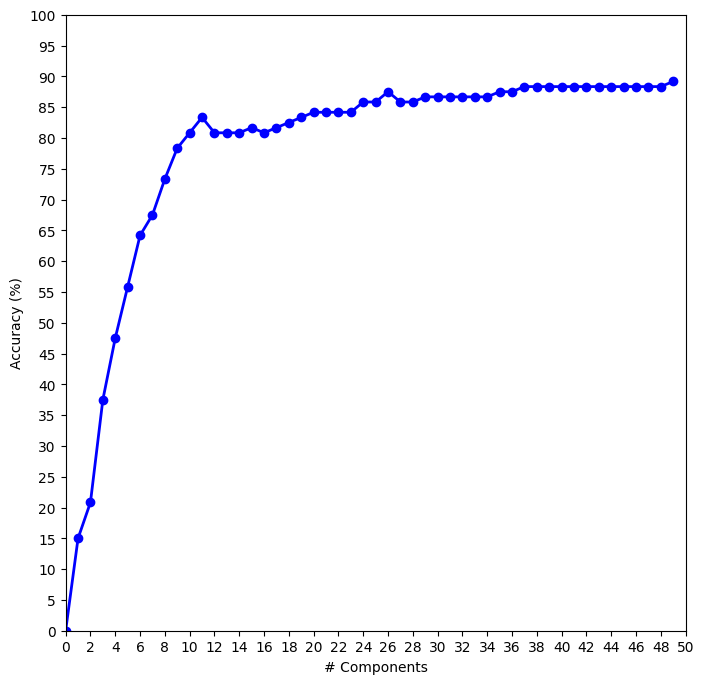

In [8]:
best_pca_component_model(X_train,X_test, y_train, y_test)

##  Fashion mnist

In [30]:
import numpy as np
from sklearn.datasets import fetch_openml
fashion_mnist_X, fashion_mnist_y = fetch_openml('Fashion-MNIST', return_X_y=True, as_frame=False, parser='auto')
X_train = fashion_mnist_X[:60000].astype(np.float32); y_train = fashion_mnist_y[:60000].astype(np.uint8)
X_test = fashion_mnist_X[60000:].astype(np.float32); y_test = fashion_mnist_y[60000:].astype(np.uint8)
labels = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


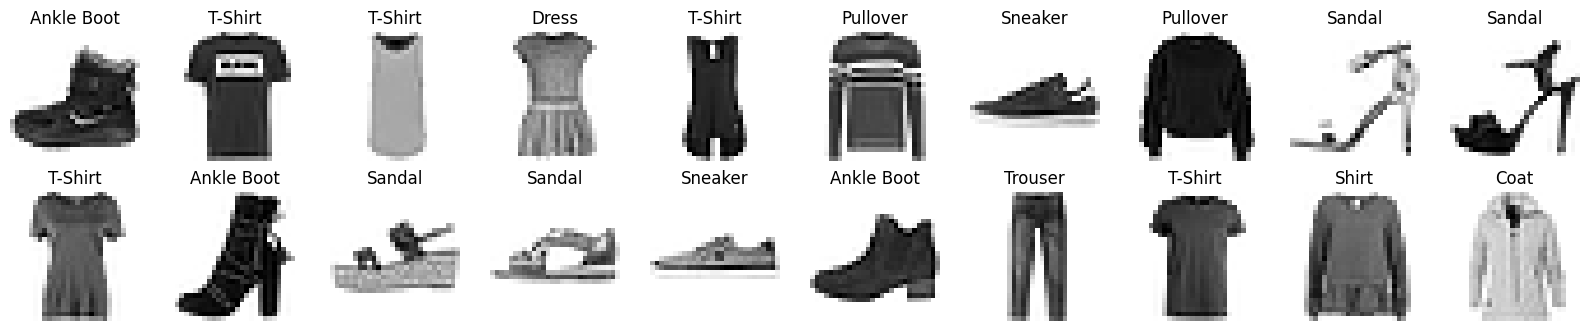

In [31]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(labels[y])
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

La precisión de GaussianNB() es 58.6%
La precisión de GaussianNB(var_smoothing=1e-05) es 63.0%
La precisión de GaussianNB(var_smoothing=0.1) es 67.2%
La precisión de GaussianNB(var_smoothing=0.2) es 67.0%
La precisión de GaussianNB(var_smoothing=0.5) es 65.9%
La precisión de GaussianNB(var_smoothing=1) es 64.8%


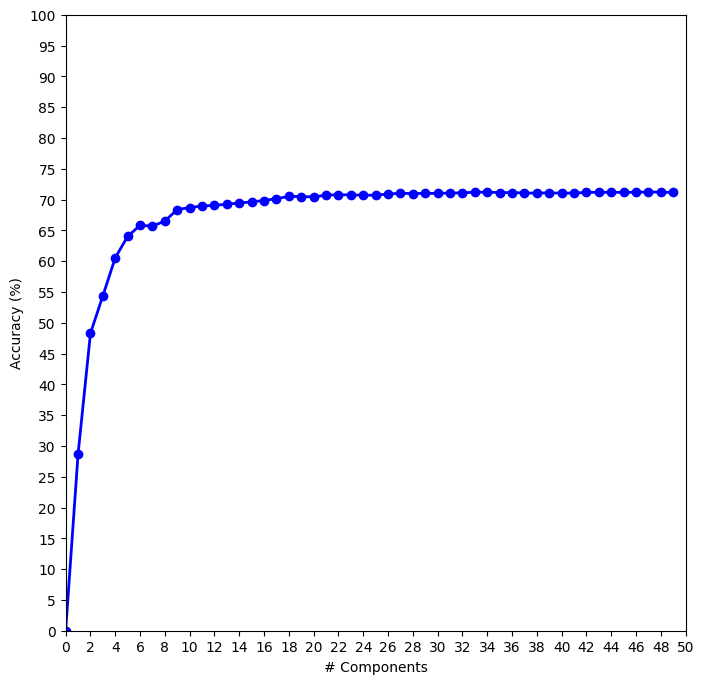

In [32]:
best_pca_component_model(X_train,X_test, y_train, y_test)

## CIFAR-10 

In [42]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_10_X, cifar_10_y = fetch_openml('CIFAR_10', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_10_X[:50000]; y_train = cifar_10_y[:50000].astype('uint8')
X_test = cifar_10_X[50000:]; y_test = cifar_10_y[50000:].astype('uint8')
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


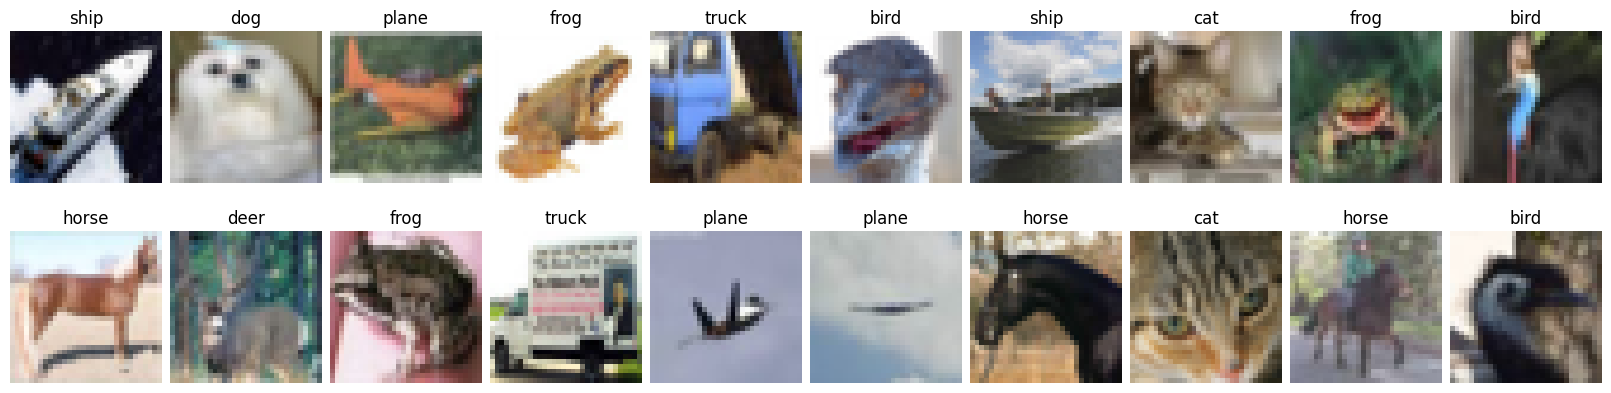

In [43]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 20*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); ax.set_title(labels[y])
    ax.imshow(image, interpolation="none")


In [46]:
X_train.shape,X_train[0].shape

((50000, 3072), (3072,))

In [47]:
X_train[0]

array([26, 17, 13, ..., 27, 26, 27], dtype=int64)

La precisión de GaussianNB() es 29.8%
La precisión de GaussianNB(var_smoothing=1e-05) es 29.8%
La precisión de GaussianNB(var_smoothing=0.1) es 28.2%
La precisión de GaussianNB(var_smoothing=0.2) es 27.4%
La precisión de GaussianNB(var_smoothing=0.5) es 25.6%
La precisión de GaussianNB(var_smoothing=1) es 24.3%


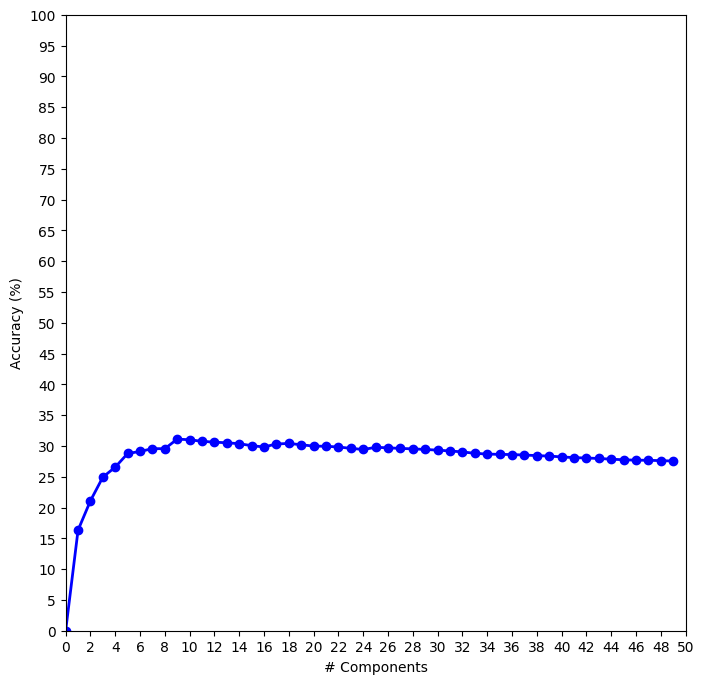

In [48]:
best_pca_component_model(X_train,X_test, y_train, y_test)

##  CIFAR-100

In [38]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_100_X, cifar_100_y = fetch_openml('CIFAR-100', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_100_X[:50000]; y_train = cifar_100_y[:50000].astype('uint8')
X_test = cifar_100_X[50000:]; y_test = cifar_100_y[50000:].astype('uint8')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


In [39]:
fine_labels = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle',
    'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar',
    'cattle', 'chair',  'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
    'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 
    'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 
    'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
    'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 
    'willow_tree', 'wolf', 'woman', 'worm')
coarse_labels = ('aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 
    'household electrical device', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees',
    'vehicles 1', 'vehicles 2')
fine2coarse = (4, 1, 14, 8, 0, 6, 7, 7, 18, 3, 3, 14, 9, 18, 7, 11, 3, 9, 7, 11, 6, 11, 5, 10, 7, 6, 13, 
    15, 3, 15, 0, 11, 1, 10, 12, 14, 16, 9, 11, 5, 5, 19, 8, 8, 15, 13, 14, 17, 18, 10, 16, 4, 17, 4, 2, 
    0, 17, 4, 18, 17, 10, 3, 2, 12, 12, 16, 12, 1, 9, 19, 2, 10, 0, 1, 16, 12, 9, 13, 15, 13, 16, 19, 2, 
    4, 6, 19, 5, 5, 8, 19, 18, 1, 2, 15, 6, 0, 17, 8, 14, 13)

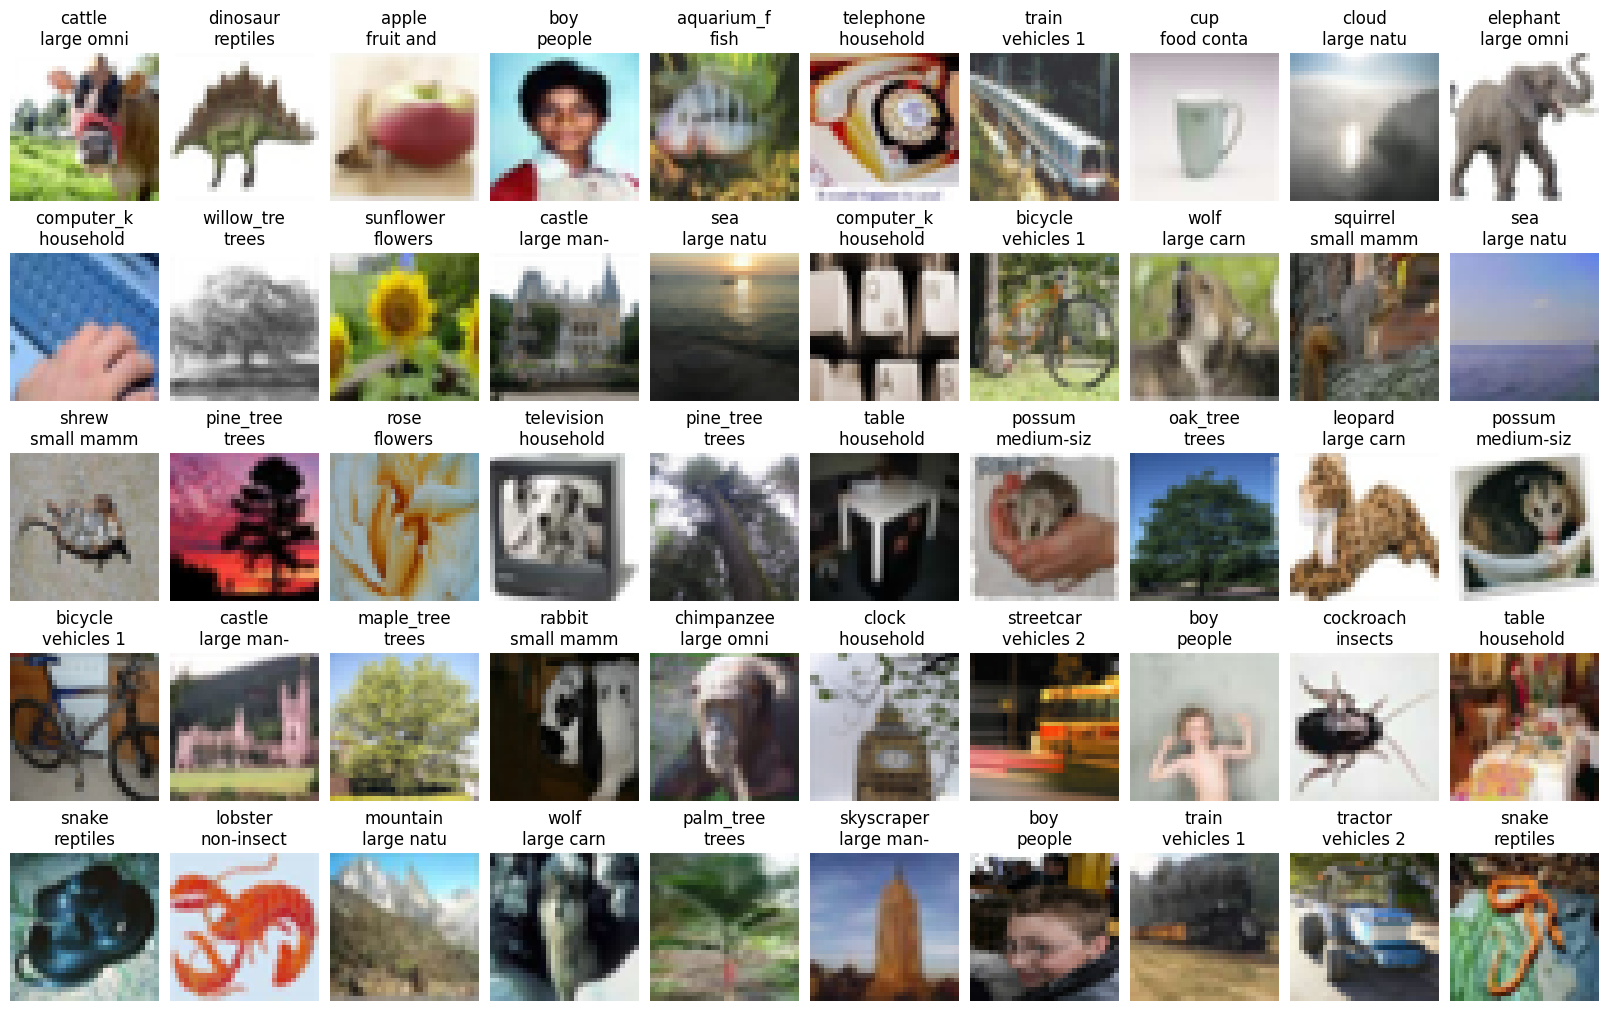

In [40]:
import matplotlib.pyplot as plt
nrows = 5; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 20*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); 
    ax.set_title(fine_labels[y][:10]+ "\n" + coarse_labels[fine2coarse[y]][:10])
    ax.imshow(image, interpolation="none")

In [41]:
best_pca_component_model(X_train,X_test, y_train, y_test)

La precisión de GaussianNB() es 11.3%
La precisión de GaussianNB(var_smoothing=1e-05) es 11.3%


KeyboardInterrupt: 

In [ ]:
X_train.shape, X_train[0].shape